# ME 781 Statistical machine learning and data mining

Name: S Dharunlal Prasad

Roll no: 200010070

## Check Password Strength Using ML algorithms

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/data.csv",',',error_bad_lines=False)

<ipython-input-2-395c3cbb03ec>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("/content/data.csv",',',error_bad_lines=False)
<ipython-input-2-395c3cbb03ec>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/data.csv",',',error_bad_lines=False)
Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26

In [ ]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
y = data['strength']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: strength, dtype: int64

In [ ]:
X = data['password']

In [ ]:
X.head()

0       vnyrjpt631
1         9c0e08ua
2    zerobytes1234
3        onexop875
4         11o7y830
Name: password, dtype: object

<Axes: xlabel='strength', ylabel='count'>

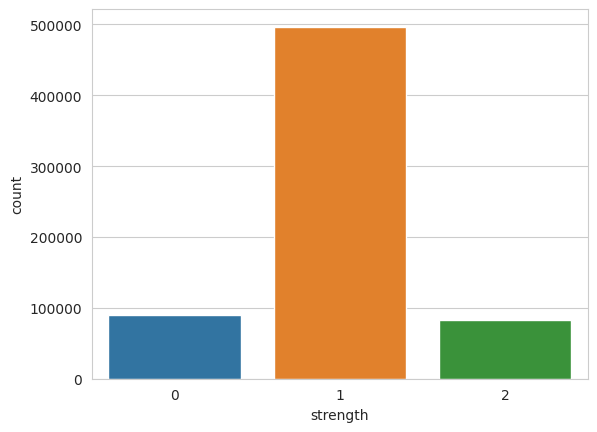

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data)

In [ ]:
def words_to_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=words_to_char)
X=vectorizer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X.shape

(669639, 153)

In [ ]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vectorizer.vocabulary_

{'v': 77,
 'n': 69,
 'y': 80,
 'r': 73,
 'j': 65,
 'p': 71,
 't': 75,
 '6': 40,
 '3': 37,
 '1': 35,
 '9': 43,
 'c': 58,
 '0': 34,
 'e': 60,
 '8': 42,
 'u': 76,
 'a': 56,
 'z': 81,
 'o': 70,
 'b': 57,
 's': 74,
 '2': 36,
 '4': 38,
 'x': 79,
 '7': 41,
 '5': 39,
 'i': 64,
 'm': 68,
 'g': 62,
 'd': 59,
 'w': 78,
 'l': 67,
 'h': 63,
 'q': 72,
 'k': 66,
 '.': 32,
 'f': 61,
 '@': 49,
 '*': 29,
 '-': 31,
 '_': 54,
 '/': 33,
 '$': 24,
 '%': 25,
 '\\': 51,
 '#': 23,
 ' ': 20,
 '!': 21,
 '&': 26,
 ';': 44,
 ']': 52,
 ')': 28,
 '=': 46,
 '<': 45,
 '~': 85,
 '?': 48,
 '^': 53,
 '[': 50,
 '+': 30,
 '|': 83,
 '(': 27,
 '>': 47,
 '`': 55,
 'þ': 142,
 'ó': 132,
 'ñ': 130,
 'ä': 119,
 '±': 99,
 'ÿ': 143,
 '{': 82,
 'µ': 103,
 'å': 120,
 '³': 101,
 'ç': 122,
 'º': 107,
 '÷': 136,
 '\x1c': 17,
 'é': 124,
 'õ': 134,
 '\x06': 4,
 '}': 84,
 'ú': 138,
 '\x10': 8,
 '\x17': 13,
 '‡': 148,
 '\x7f': 86,
 '·': 105,
 'ò': 131,
 '°': 98,
 'ô': 133,
 'û': 139,
 'í': 126,
 '\x8d': 88,
 '\x18': 14,
 'ü': 140,
 '"': 22,

In [ ]:
data.iloc[0][0]

'vnyrjpt631'

In [ ]:
feature_names = vectorizer.get_feature_names_out()

#get tfidf vector for first document
first_document_vector=X[0]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
v,0.382770
j,0.367426
p,0.350383
6,0.334053
y,0.329270
...,...
\,0.000000
],0.000000
^,0.000000
_,0.000000


In [ ]:
## Logistics Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting


In [ ]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [ ]:
print(log_class.score(X_test,y_test))

0.8121751986141807


In [ ]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8192984290066304


In [ ]:
X_predict=np.array(["2DFSabc#d$$$$"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_class = LinearRegression()

In [ ]:
lin_class.fit(X_train, y_train)
print(lin_class.score(X_test,y_test))

0.43358610232055605


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
DT = DecisionTreeClassifier(max_features =50)
DT.fit(X_train, y_train)
print(DT.score(X_test,y_test))

0.9192625888537125


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()



In [ ]:
RFC.fit(X_train, y_train)
print(RFC.score(X_test,y_test))

0.955498476793501


We have used Logistic Regression, Decision Tree and Random forest methods for our prediction of password strength.We got the highest result in Random forest but it is very expensive in time.